# Lecture 1 Introduction to Finite Differences

We will build this lecture around the example PDE

$$
u_t(x,t) = K u_{xx}(x,t)
$$

Our goal will be to find an approximate solution to this PDE. 
We will use the initial condition 

$$
u(x,0) = g(x) = \frac{100x}{L} + 10\sin\left(\frac{4\pi x}{L}\right)
$$

and boundary conditions

\begin{align*}
u(0,t) &= 0\\
u(L,t) &= 100
\end{align*}

When we need to use specific values, we will take $K=4$ and $L=5$.



## Discretizing space

We will attempt to find the values 

$$
u_i^j \equiv u(x_i,t_j)
$$ 
for discrete values $x_i$ and $t_j$ with 

$$
x_i = i \Delta x , \qquad i = 0,1,\ldots, N
$$
and

$$t_j = j \Delta t, \qquad j = 0, 1,\ldots
$$
We set $\Delta x = L/N$ so that there are $N+1$ values and $x_N=L$. 

To do this we will use finite differences in order to express the derivatives in the PDE in terms of the different values $u_j^i$.



## Finite Differences

We will focus on finite differences in one dimension.  We will take a function $f(x)$, and discretize it to have values at a sequence of $x$ values $\ldots, x_{i-1}, x_i, x_{i+1}, \ldots$.  

To set things a bit more formal, we will assume that $f$ is smooth.  This means that we can differentiate it as many times as we will need in our calculations below and the derivatives are continuous.

We define

\begin{align*}
F_{i+1} &= f(x_{i+1})\\
F_i &= f(x_i)\\
F_{i-1} & f(x_{i-1})
\end{align*}

we will want to work out approximations to 

$$
F_i' = f'(x_i)
$$
and

$$
F_i'' = f''(x_i)
$$
in terms of $F_{i+1}$, $F_i$, and $F_{i-1}$.


### Finite Difference Approximations for the First derivative

#### Forward difference

The definition of the derivative 

$$
F_i' \equiv f'(x_i) = \lim_{\Delta x \to 0} \frac{f(x_i+\Delta x) - f(x_i)}{\Delta x}
$$
suggests that a good approximation would be

$$
F_i' \approx D_+(f(x_i)) \equiv \frac{F_{i+1} - F_i}{\Delta x}
$$ (Forward_Diff)

where $D_+$ gives the **forward difference** approximation to $F_i'$.

We explore this in calculations below for the function $f(x)= x^2+x^3$, using $x_i=1$ and $\Delta x = 0.5$.  

Look at the graphs generated by the calculations below.  Rerun the calculations with other values of  `dx` to confirm that as `dx` decreases this slope approaches the correct slope.

Geometrically, we see that near $x_i$, the curve is nearly parallel to the tangent: the tangent lies almost on top of the curve. So if we have $\Delta x$ small enough that $x_{i+1}$ fits in the region where the curve and the tangent overlap, then we will have a very good approximation.

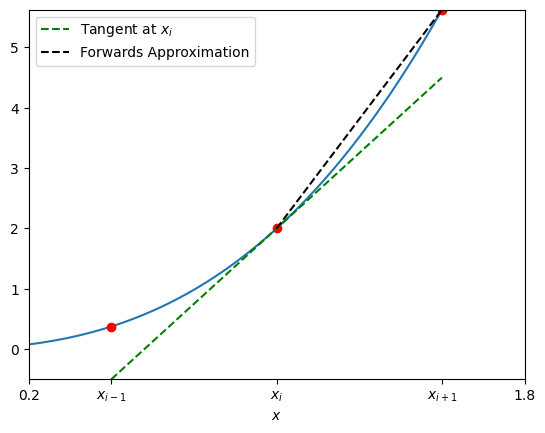

In [2]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

dx = 0.5


x_vals = np.array([1-dx, 1.0, 1+dx])
f_vals = x_vals**2 + x_vals**3

tangent = 5*(x_vals -x_vals[1]) + f_vals[1]

forward_diff = (f_vals[2]-f_vals[1])/dx
    
approx = forward_diff*(x_vals[1:] - x_vals[1]) + f_vals[1]

plt.plot(x, x**2 + x**3)
plt.plot(x_vals, f_vals, 'ro')
plt.plot(x_vals, tangent, 'g--', label='Tangent at $x_i$')
plt.xlabel('$x$')
plt.plot(x_vals[1:], approx, 'k--', label='Forwards Approximation')
plt.xlim([x_vals[0]-0.5*dx, x_vals[-1]+0.5*dx])
plt.ylim([min(tangent), f_vals[-1]])
plt.xticks([x_vals[0]-0.5*dx]+list(x_vals)+ [x_vals[-1]+0.5*dx], labels = [f'{x_vals[0]-0.5*dx:.1f}','$x_{i-1}$', '$x_i$', '$x_{i+1}$', f'{x_vals[-1]+0.5*dx:.1f}'])

plt.legend()


We can estimate the error in the forward difference approximation $D_+(f(x_i))$ algebraically with the Taylor Series expanded about $x_i$:

\begin{align*}
F_{i+1} &= F_i + (\Delta x) F_i' + \frac{(\Delta x)^2}{2} F_i'' + \cdots \\
F_i &= F_i
\end{align*}
So

\begin{align*}
D_+(f(x_i)) &= \frac{F_{i+1}-F_i}{\Delta x}\\
&= \frac{(\Delta x) F_i' + \frac{(\Delta x)^2}{2} F_i'' + \cdots}{\Delta x}\\
&= F_i' + \mathcal{O}(\Delta x)
\end{align*}

where $\mathcal{O}(\Delta x)$ means a neglected term that is order $\Delta x$.  We call such an approximation **First Order Accurate**.

#### Backward Difference

We observed that if $x_{i+1}$ is close enough to $x_i$, then the line joining the points at $x_i$ and $x_{i+1}$ will basically overlap with the tangent curve, and so for small enough $\Delta x$, the slope of this line approximates the derivative well.

This also applies for $x_{i-1}$.  So we expect the **backwards difference**

$$
D_-(f(x_i)) = \frac{F_i - F_{i-1}}{\Delta x}
$$ (Backward_Diff)
to also be a good approximation to $F_i'$

As a **self-test**, please write out the Taylor Series expansion of $F_{i-1}$ and use it to estimate the error in the backwards difference approximation.  The method should resemble the process for the forward difference, with some changes due to the $x$-shift from $x_i$ being negative.

You should confirm that the backwards difference is **First Order Accurate**.

Again, you can run the calculations below and change `dx`.


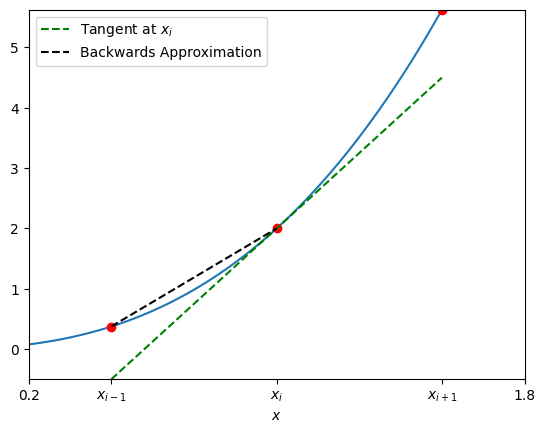

In [3]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

dx = 0.5


x_vals = np.array([1-dx, 1.0, 1+dx])
f_vals = x_vals**2 + x_vals**3

tangent = 5*(x_vals -x_vals[1]) + f_vals[1]

backward_diff = (f_vals[1]-f_vals[0])/dx
    
approx = backward_diff*(x_vals[:2] - x_vals[1]) + f_vals[1]

plt.plot(x, x**2 + x**3)
plt.plot(x_vals, f_vals, 'ro')
plt.plot(x_vals, tangent, 'g--', label='Tangent at $x_i$')
plt.xlabel('$x$')
plt.plot(x_vals[:2], approx, 'k--', label='Backwards Approximation')
plt.xlim([x_vals[0]-0.5*dx, x_vals[-1]+0.5*dx])
plt.ylim([min(tangent), f_vals[-1]])
plt.xticks([x_vals[0]-0.5*dx]+list(x_vals)+ [x_vals[-1]+0.5*dx], labels = [f'{x_vals[0]-0.5*dx:.1f}','$x_{i-1}$', '$x_i$', '$x_{i+1}$', f'{x_vals[-1]+0.5*dx:.1f}'])

plt.legend()


#### Central difference

A common theme in Finite Differences is that using formulae that are symmetric about the desired point gives a better approximation.  In a moment you will see an example.  The key detail is that the error on different sides may cancel.  Let's make this precise.

If we use

$$
D_0(f(x_i)) = \frac{F_{i+1}-F_{i-1}}{2\Delta x}
$$
then substituting in the Taylor Series we use

\begin{align*}
F_{i+1} &= F_i + (\Delta x) F_i' + \frac{(\Delta x)^2}{2} F_i'' + \frac{(\Delta x)^3}{6} + \cdots\\
F_{i-1} &= F_i - (\Delta x) F_i' + \frac{(\Delta x)^2}{2} F_i'' - \frac{(\Delta x)^3}{6} + \cdots
\end{align*}
When we subtract $F_{i-1}$ from $F_{i+1}$ all of the even terms cancel.  We are left

$$

= \frac{2(\Delta x)F_i' + \frac{(\Delta x)^3}{3} F_i''' + \cdots}{2\Delta x}\\
$$

Simplifying we get

$$
\frac{F_{i+1}-F_{i-1}}{2\Delta x}= F_i' + \mathcal{O}((\Delta x)^2)
$$ (Central_Diff)

So the Central Difference approximation is **Second Order Accurate**

As a **self-test** confirm that $D_0(f(x_i))$ is the average of $D_+(f(x_i))$ and $D_-(f(x_i))$.  Also check that the leading error terms in $D_+$ and $D_-$ are equal in magnitude but in opposite directions and so taking the average allows the error to cancel.

Again, you can run the code with different values of `dx`.

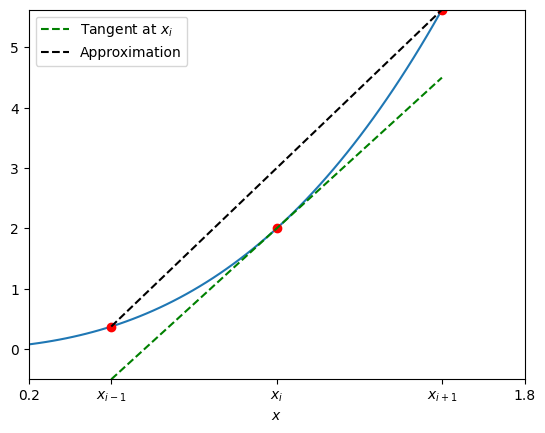

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

dx = 0.5


x_vals = np.array([1-dx, 1.0, 1+dx])
f_vals = x_vals**2 + x_vals**3

tangent = 5*(x_vals -x_vals[1]) + f_vals[1]

central_diff = (f_vals[2]-f_vals[0])/(2*dx)
    
approx = central_diff*np.array([0,2*dx]) + f_vals[0]

plt.plot(x, x**2 + x**3)
plt.plot(x_vals, f_vals, 'ro')
plt.plot(x_vals, tangent, 'g--', label='Tangent at $x_i$')
plt.xlabel('$x$')
plt.plot([x_vals[0],x_vals[2]], approx, 'k--', label='Central Difference Approximation')
plt.xlim([x_vals[0]-0.5*dx, x_vals[-1]+0.5*dx])
plt.ylim([min(tangent), f_vals[-1]])
plt.xticks([x_vals[0]-0.5*dx]+list(x_vals)+ [x_vals[-1]+0.5*dx], labels = [f'{x_vals[0]-0.5*dx:.1f}','$x_{i-1}$', '$x_i$', '$x_{i+1}$', f'{x_vals[-1]+0.5*dx:.1f}'])

plt.legend()


The increased accuracy is a big deal. The plot below compares the error in calculating $F_i'$ using forward difference and central difference.

To get a given small level of error, we can use a much larger step size with the central difference, by orders of magnitude.

<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
C:\Users\JCMiller\AppData\Local\Temp\ipykernel_32028\214703529.py:17: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('Step Size $\Delta x$')
C:\Users\JCMiller\AppData\Local\Temp\ipykernel_32028\214703529.py:19: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Error in Numerical Derivative of $df(1)/dx$ for given $\Delta x$')


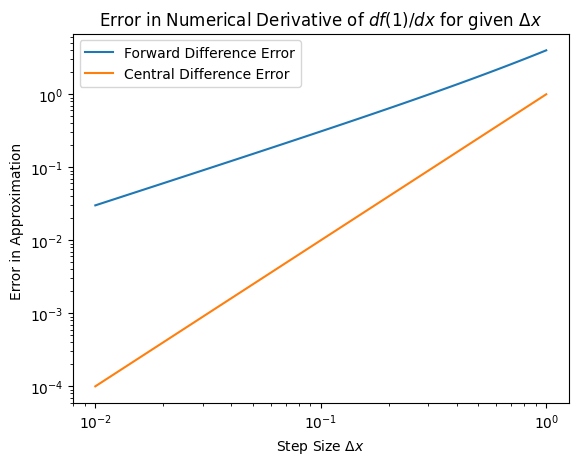

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
true_derivative = 5

dx = np.linspace(0.01, 1, 100)
x_next = 1 + dx
F_next = x_next**2 + x_next**3
x_prev = 1 - dx
F_prev = x_prev**2 + x_prev**3
forward_derivative = (F_next - (1**2 + 1**3))/dx
central_derivative = (F_next - F_prev)/(2*dx)

plt.plot(dx, np.abs(forward_derivative - true_derivative), label='Forward Difference Error')
plt.plot(dx, np.abs(central_derivative - true_derivative), label='Central Difference Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step Size $\Delta x$')
plt.ylabel('Error in Approximation ')
plt.title('Error in Numerical Derivative of $df(1)/dx$ for given $\Delta x$')
plt.legend()

### Finite Difference Approximations for the Second derivative

To approximate the second derivative we allow ourselves to use all three values $F_{i+1}$, $F_i$, and $F_{i-1}$.  To find a combination that results in $F_i''$, we start by writing out their Taylor Series expansions around $x_i$:

\begin{align*}
F_{i+1} &= F_i + (\Delta x) F_i' + \frac{(\Delta x)^2}{2} F_i'' + \frac{(\Delta x)^3}{6} F_i''' + \frac{(\Delta x)^4}{24} F_i''''\\
F_i &= F_i\\
F_{i-1} &= F_i - (\Delta x) F_i' + \frac{(\Delta x)^2}{2} F_i'' - \frac{(\Delta x)^3}{6} F_i''' + \frac{(\Delta x)^4}{24} F_i''''
\end{align*}

If we add $F_{i+1}$ and $F_{i-1}$, all of the odd terms will cancel.  We are left 

$$
F_{i+1} + F_{i-1} = 2 F_i + (\Delta x)^2 F_i'' + \frac{(\Delta x)^4}{12} F_i''''
$$

Subtracting $2F_i$ from this and dividing by $(\Delta x)^2$ yields

$$
\frac{F_{i+1}-2F_i + F_{i-1}}{(\Delta x)^2} = F_i'' + \mathcal{O}((\Delta x)^2)
$$ (Second_Diff)


## Returning to the PDE

We are now ready to write out the equations for each (interior) grid point.  We have $u_t = K u_{xx}$.  


At an interior point $(x_i,t_j)$, we can approximate the $t$ derivative using a forward difference.  For the $t$ derivative, we treat $u$ as a function of the single variable $t$, holding $x = x_i$ fixed.

The derivative is found by subtracting the value of $u$ at the grid point from the value of $u$ at the next grid point in the $t$ direction and dividing by $\Delta t$, following {eq}`Forward_Diff`:

$$
u_t(x_i,t_j) = \frac{u_i^{j+1} - u_i^j}{\Delta t} + \mathcal{O}(\Delta t)
$$

Now we do the same for the second $x$ derivative following {eq}`Second_Diff`.  This time we treat it as a function of the single variable $x$, holding $t=t_j$ fixed.

$$
u_{xx}(x_i, t_j) = \frac{u_{i+1}^j - 2 u_i^j + u_{i-1}^j}{(\Delta x)^2} +\mathcal{O}(\Delta x^2)
$$

As 

$$
u_{t} = K u_{xx}
$$
we conclude

\begin{align*}
\frac{u_i^{j+1} - u_i^j}{\Delta t} + \mathcal{O}(\Delta t) &= K \left(\frac{u_{i+1}^j - 2 u_i^j + u_{i-1}^j}{(\Delta x)^2} +\mathcal{O}(\Delta x)^2\right)\\
u_i^{j+1} &= u_i^j + \frac{\Delta t}{(\Delta x)^2} \left(u_{i+1}^j - 2 u_i^j + u_{i-1}^j\right) + \mathcal{O}(\Delta t (\Delta x)^2)
\end{align*}



Our initial condition gives us $u_i^0$ for all $i=0,\ldots, N$.  From this and the equation above, we can deduce an approximation for $u_i^{1}$ for all $i=1,\ldots, N-1$.  The boundary conditions give us the values for $i=0$ and $i=N$.  Note that due to our constant boundary conditions, we can use the equation $u_0^1=u_0^0$ and $u_N^1=u_N^0$.

Once we have $u_i^1$ for all $i$, we can repeat, getting a new approximation for $u_i^2$.  Iterating forward we effectively implement Euler's method in time.

For clarity, we will alter our notation to use $U_i^j$ to represent the approximation to $u_i^j$.  For simplification, we will define $r=\Delta t/(\Delta x)^2$  We have

$$
\begin{pmatrix}
U_0^{j+1}\\
U_1^{j+1}\\
U_2^{j+1}\\
U_3^{j+1}\\
\vdots\\
\vdots\\
%U_{N-3}^{j+1}\\
U_{N-2}^{j+1}\\
U_{N-1}^{j+1}\\
U_N^{j+1}
\end{pmatrix}
=
\begin{pmatrix}
1 & 0& & &  & & & & & \\
r &1-2r &r & & & && & & \\
& r &1-2r &r & & & &  & & \\
 & & r &1-2r &r &  & & & & \\
 & & &  & & \ddots & & & & \\
 & & &  & \ddots & \ddots &   & &&\\
 &  &  &  & & r &1-2r & r &  & \\
 &  &  &  &    &  &r &1-2r & r & \\
 & &&&  & & &r &1-2r & r\\
 &  &  &  &   &  &  & &0 & 1
\end{pmatrix}
\begin{pmatrix}
U_0^{j}\\
U_1^{j}\\
U_2^{j}\\
U_3^{j}\\
\vdots\\
\vdots\\
%U_{N-3}^{j}\\
U_{N-2}^{j}\\
U_{N-1}^{j}\\
U_N^{j}
\end{pmatrix}
$$


[ 0.          3.33825246  6.59241759  9.68369159 12.5435057  15.11783464
 17.37059121 19.28589378 20.8690642  22.14629341 23.16299576 23.98095545
 24.67444442 25.32555558 26.01904455 26.83700424 27.85370659 29.1309358
 30.71410622 32.62940879 34.88216536 37.4564943  40.31630841 43.40758241
 46.66174754 50.         53.33825244 56.59241754 59.68369142 62.54350513
 65.1178328  67.37058558 69.28587748 70.86901932 72.1461758  73.16270215
 73.9802565  74.67285625 75.32210772 76.01188609 76.8227765  77.82660891
 79.08143069 80.62726153 82.48296285 84.64451899 87.08496118 89.75605797
 92.59174644 95.51310113]


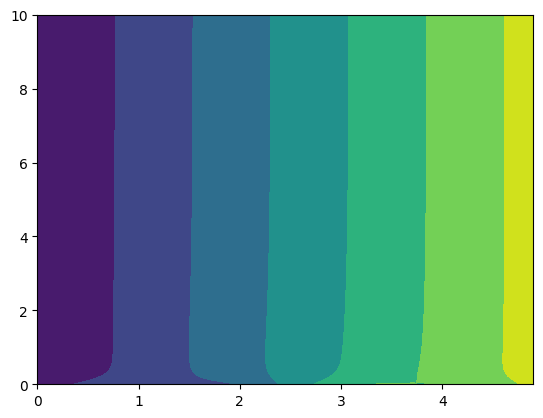

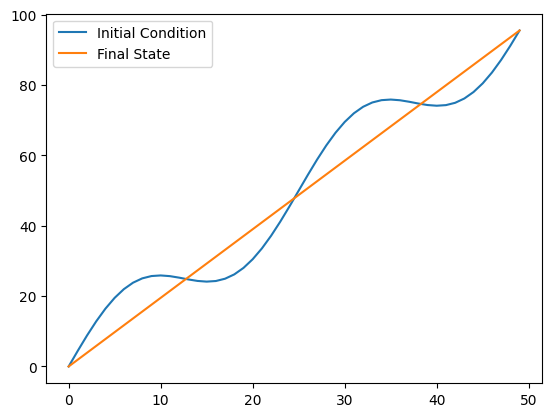

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
r=0.2
dx = 0.1
dt = r*dx**2

L=5
x = np.arange(0, L, dx)
t = np.arange(0, 10+dt, dt)

[X,Y] = np.meshgrid(x, t)
Z = np.zeros_like(X)

A = np.zeros((len(x),len(x)))
for counter in range(len(x)):
    if counter == 0:
        A[counter, counter] = 1
    elif counter == len(x)-1:
        A[counter, counter] = 1
    else:
        A[counter, counter-1] = r
        A[counter, counter] = 1 - 2*r
        A[counter, counter+1] = r

# A = np.zeros((len,len(x)))
# A[0] = r
# A[1] = 1-2*r
# A[2] = r

# A[0,0]=0
# A[0,1]=0
# A[2,-1]=0
# A[2,-2]=0

Z[0,:] = x*100/L + 10*np.sin(4*np.pi*x/L)
for counter in range(1,len(Z)):
    Z[counter,:] = np.matmul(A,Z[counter-1,:])

print(Z[49,:])
plt.contourf(X, Y, Z, cmap='viridis')

plt.figure(2)
plt.plot(Z[0,:], label='Initial Condition')
plt.plot(Z[-1,:], label = 'Final State')
plt.legend()